In [1]:
# import dependencies

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# getting path for dataset
for dirname, _, filenames in os.walk('E:\MSc DataAnalytics\Learning\DMML_1\HeartDiseasePRediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\MSc DataAnalytics\Learning\DMML_1\HeartDiseasePRediction\Heart_Disease_Prediction.csv


In [2]:
df = pd.read_csv("E:\MSc DataAnalytics\Learning\DMML_1\HeartDiseasePRediction\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [37]:
df.rename(columns={'Heart Disease': 'HeartDisease','Max HR':'MaxHR'},inplace = True)
df['HrtDisInd'] = np.where(df['HeartDisease'] == 'Presence', 1, 0)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   MaxHR                    270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  HeartDisease             270 non-null    object 
 14  HrtDisInd                2

In [38]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
MaxHR                      0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
HeartDisease               0
HrtDisInd                  0
dtype: int64

In [39]:
df.HeartDisease.value_counts()

Absence     150
Presence    120
Name: HeartDisease, dtype: int64

In [40]:
presence = df[df.HeartDisease=='Presence']
absence = df[df.HeartDisease=='Absence']

In [41]:
print(presence.shape,absence.shape)

(120, 15) (150, 15)


In [42]:
presence.Cholesterol.describe()

count    120.000000
mean     256.466667
std       47.969166
min      149.000000
25%      227.250000
50%      255.500000
75%      286.500000
max      409.000000
Name: Cholesterol, dtype: float64

In [43]:
absence.Cholesterol.describe()

count    150.000000
mean     244.213333
std       54.019085
min      126.000000
25%      209.000000
50%      236.000000
75%      268.750000
max      564.000000
Name: Cholesterol, dtype: float64

In [44]:
df.groupby('HeartDisease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,MaxHR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HrtDisInd
HeartDisease,,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667,0.0
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333,1.0


In [45]:
absence_sample = df.sample(n=492,replace=True)

In [46]:
df_new = pd.concat([absence_sample, presence], axis=0)
print(df_new.shape)

(612, 15)


In [49]:
X = df_new.drop(columns=["HeartDisease","HrtDisInd"], axis=1)
Y = df_new["HrtDisInd"]

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(612, 13) (489, 13) (123, 13)
(612,) (489,) (123,)


In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train, Y_train)

E:\MSc DataAnalytics\Learning\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
training_data_predictions = model.predict(X_train)

In [54]:
test_data_predictions = model.predict(X_test)

In [55]:
print(f"The accuracy score on training data is : {round(accuracy_score(training_data_predictions, Y_train),2)}")

The accuracy score on training data is : 0.84


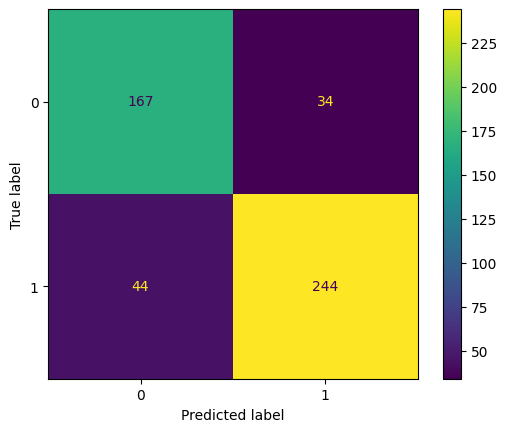

In [56]:
# confusion matrix
cf_matrix_train = confusion_matrix(Y_train, training_data_predictions)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [57]:
# precision
precision_train = precision_score(Y_train, training_data_predictions)
print(f"The precision on training data is : {round(precision_train, 2)}")

The precision on training data is : 0.88


In [58]:
# recall
recall_train = recall_score(Y_train, training_data_predictions)
print(f"The recall on training data is : {round(recall_train, 2)}")

The recall on training data is : 0.85


In [59]:
print(f"The accuracy score on test data is : {round(accuracy_score(test_data_predictions, Y_test),2)}")

The accuracy score on test data is : 0.89


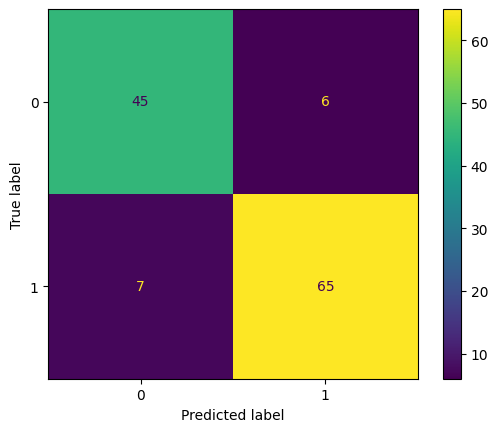

In [60]:
# confusion matrix

cf_matrix_test = confusion_matrix(Y_test, test_data_predictions)
cm_display_test = ConfusionMatrixDisplay(cf_matrix_test).plot()

In [61]:
# precision
precision_test = precision_score(Y_test, test_data_predictions)
print(f"The precision on test data is : {round(precision_test, 2)}")

The precision on test data is : 0.92


In [62]:
# recall
recall_test = recall_score(Y_test, test_data_predictions)
print(f"The recall on test data is : {round(recall_test, 2)}")

The recall on test data is : 0.9
